Name : Amey Prashant Chede 
Assignment : MLR

In [3]:
#Importing Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [7]:
#Loading the dataset and Summary Stats
df=pd.read_csv('/Users/ameychede/Downloads/MLR/ToyotaCorolla - MLR.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

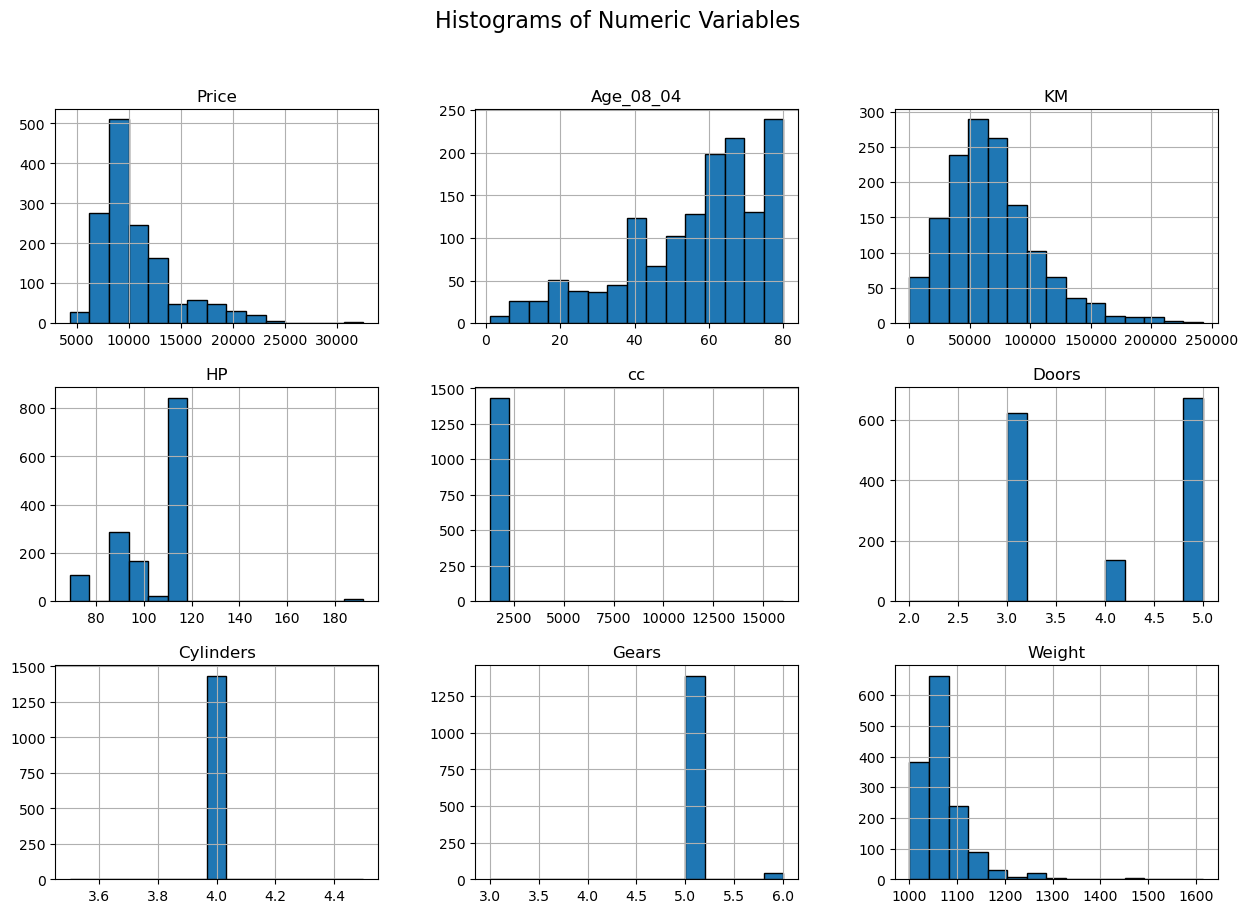

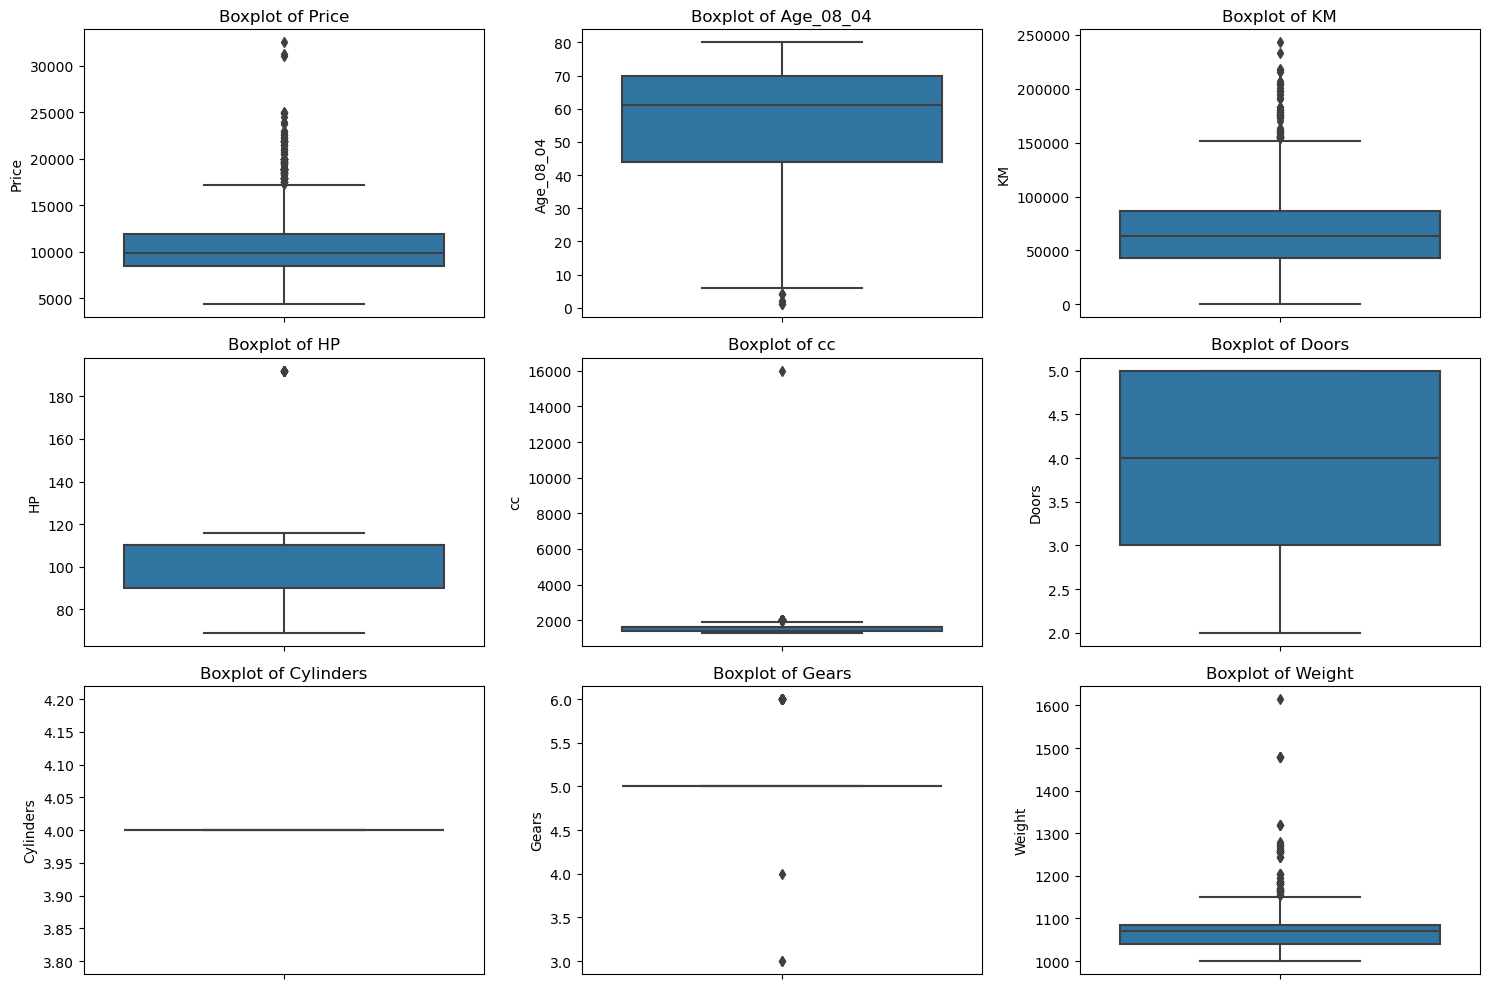

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

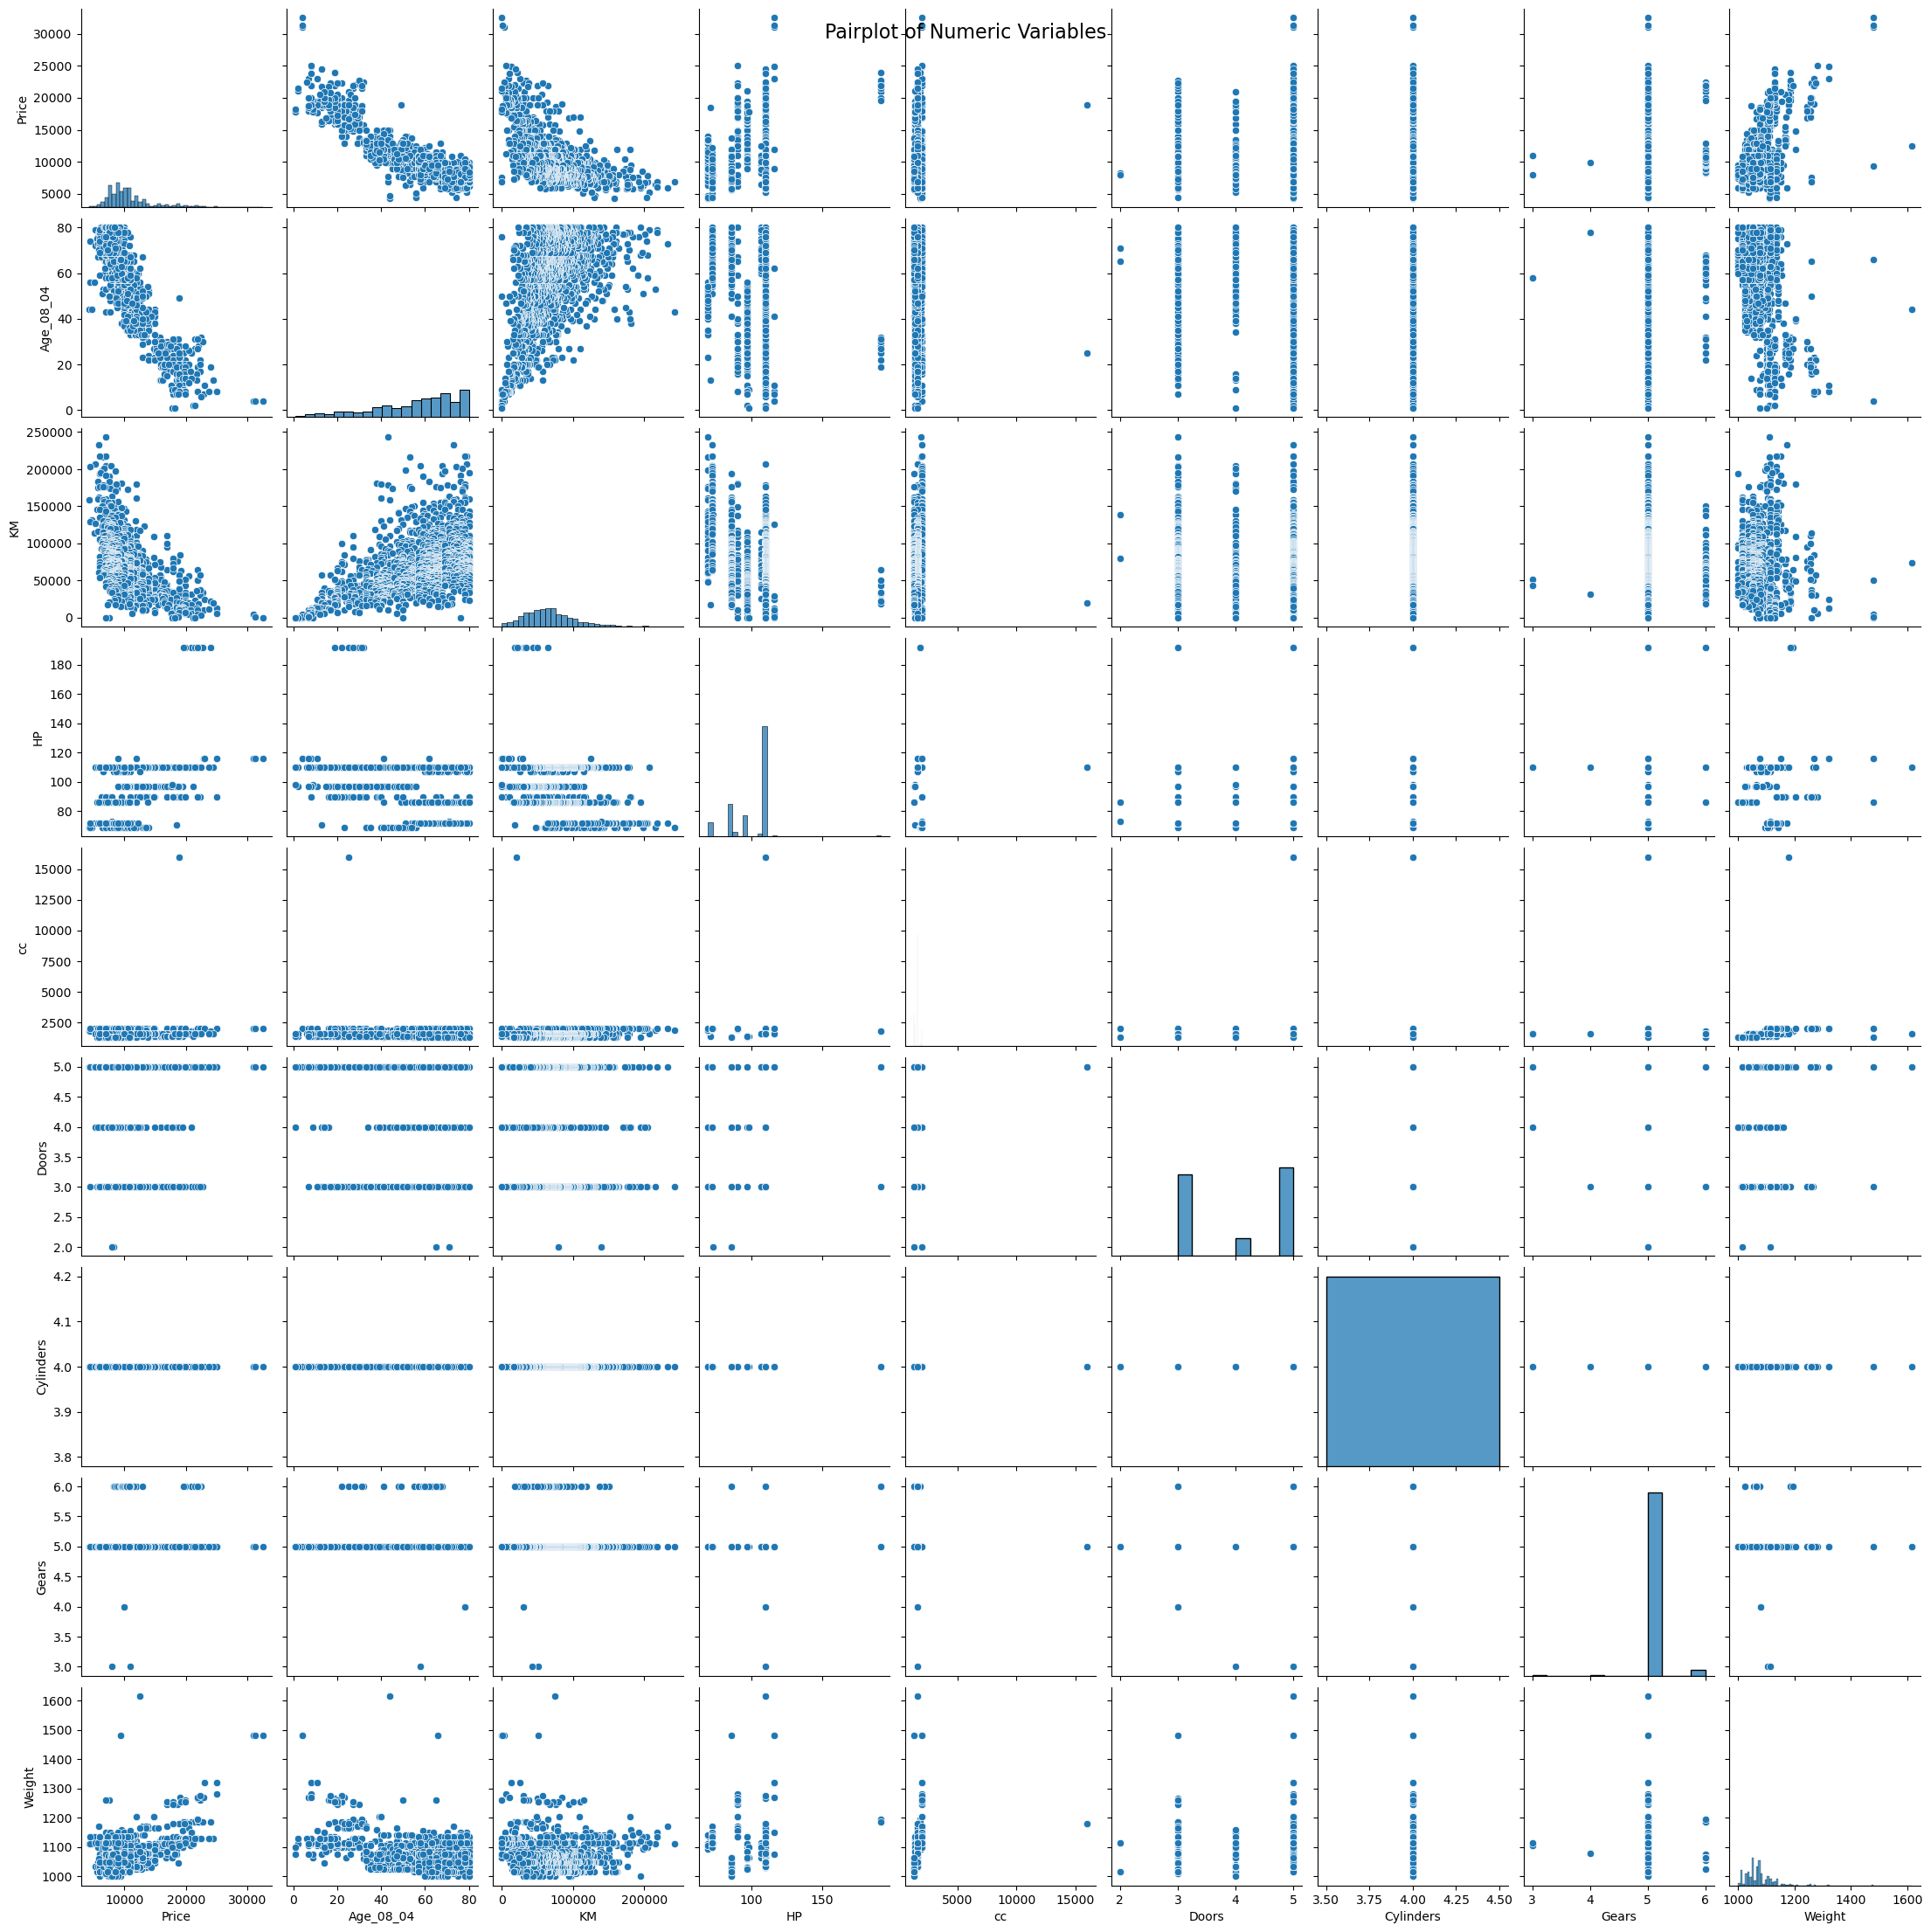

In [31]:

# Visualize the distribution of each numeric variable using boxplots and histograms
numeric_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

# Histograms
df[numeric_vars].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df[numeric_vars])
plt.suptitle('Pairplot of Numeric Variables', fontsize=16)
plt.show()




In [13]:
# Handling missing values 
df = df.dropna()  # For simplicity, we drop missing values here

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Automatic'], drop_first=True)

# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
#Splitting the dataset (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
#  linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = model_lr.predict(X_test)
print("Linear Regression - R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression - R^2: 0.834888804061108
Linear Regression - RMSE: 1484.2654153296526


In [19]:
# Lasso regression model
model_lasso = Lasso(alpha=0.1) 
model_lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lasso = model_lasso.predict(X_test)
print("Lasso Regression - R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso Regression - R^2: 0.8349120174413885
Lasso Regression - RMSE: 1484.1610734392252


In [23]:
#  Ridge regression model
model_ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
model_ridge.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_ridge = model_ridge.predict(X_test)
print("Ridge Regression - R^2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression - R^2: 0.8349066452386904
Ridge Regression - RMSE: 1484.185221621109


In [25]:
# Comparing the results
results = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R^2': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge))]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       R^2         RMSE
0  Linear Regression  0.834889  1484.265415
1   Lasso Regression  0.834912  1484.161073
2   Ridge Regression  0.834907  1484.185222


ANS 1 : Normalization scales the data to a range of [0, 1], while standardization scales the data to have a mean of 0 and a standard deviation of 1. These techniques help in bringing all features to the same scale, which improves the performance of machine learning algorithms.

ANS 2: Techniques to address multicollinearity include removing one of the correlated predictors, using Principal Component Analysis (PCA), or applying regularization methods such as Lasso and Ridge regression which penalize the coefficients of the features.